1763.8845454545458


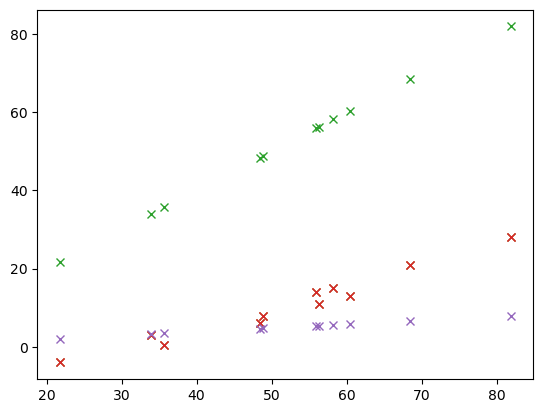

83.26638406665587


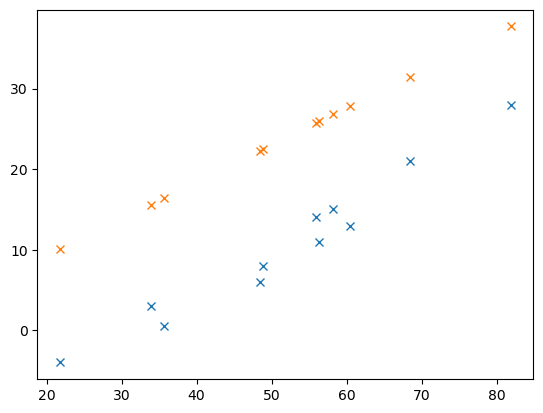

182.53341065276356


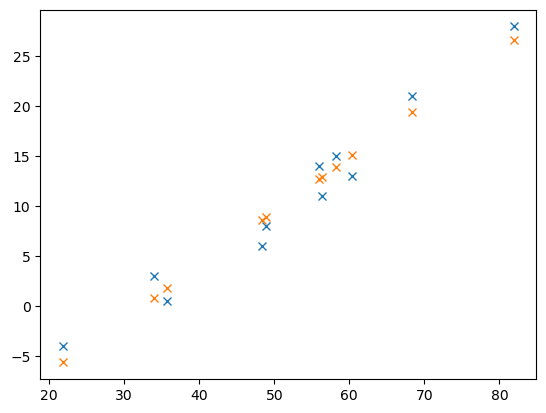

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
values = np.loadtxt('vl5_data.csv')

t_u = (values[:,1])
t_c =(values[:,0])
plt.plot(values[:,1], values[:,0], 'x')


def model(t_u,w,b):
    return np.array(w*t_u+b)

def loss_fn(t_p, t_c):
    sq_diff = (t_p-t_c)**2
    return sq_diff.mean()

w = np.ones(1)
b = np.zeros(1)
t_p = model(t_u,w,b)
plt.plot(t_u, t_c, 'x')
plt.plot(t_u, t_p, 'x')
print(loss_fn(t_p,t_c))

delta = 0.1
loss_rate_of_change_w = (loss_fn(model(t_u,w+delta,b),t_c)-loss_fn(model(t_u,w-delta,b),t_c))/(2.0*delta)
loss_rate_of_change_b = (loss_fn(model(t_u,w,b+delta),t_c)-loss_fn(model(t_u,w,b-delta),t_c))/(2.0*delta)



learning_rate = 1e-5
w = np.ones(1)
b = np.zeros(1)
for i in range(20):
    t_p = model(t_u,w,b)
    w = w- learning_rate*loss_rate_of_change_w
    b = b - learning_rate*loss_rate_of_change_b

t_p = model(t_u,w,b)
plt.plot(t_u, t_c, 'x')
plt.plot(t_u, t_p, 'x')
plt.show()
print(loss_fn(t_p,t_c))


def dloss_fn(t_p,t_c):
    return 2*(t_p-t_c)/(np.size(t_p))

def dmodel_dw(t_u,w,b):
    return t_u

def dmodel_db(t_u,w,b):
    return 1.0

def grad_fn(t_u,t_c,t_p,w,b):
    dloss_dtp = dloss_fn(t_p,t_c)
    dloss_dw = dloss_dtp*dmodel_dw(t_u,w,b)
    dloss_db = dloss_dtp*dmodel_db(t_u,w,b)
    return np.array([dloss_dw.sum(), dloss_db.sum()])


learning_rate = 1e-5
w = np.ones(1)
b = np.zeros(1)
for i in range(20):
    t_p = model(t_u,w,b)
    grad = grad_fn(t_u,t_c,t_p,w,b)
    w = w- learning_rate*grad[0]
    b = b - learning_rate*grad[1]

t_p = model(t_u,w,b)
plt.plot(t_u, t_c, 'x')
plt.plot(t_u, t_p, 'x')
plt.show()
print(loss_fn(t_p,t_c))

def training_loop(n_epochs, learning_rate, params,t_u,t_c):
    for i in range(n_epochs):
        t_p = model(t_u,params[0],params[1])
        grad = grad_fn(t_u,t_c,t_p,params[0], params[1])
        params[0] = params[0] - learning_rate*grad[0]
        params[1] = params[1] - learning_rate*grad[1]
    return np.array([params[0], params[1]])
        
w =np.ones(1)
b = np.zeros(1)
learning_rate = 1e-2
t_un = t_u*0.1
params = training_loop(5000, learning_rate,np.array([w,b]), t_un, t_c)     
t_p = model(t_un, params[0], params[1])
plt.plot(t_u, t_c,'x')
plt.plot(t_u, t_p,'x')
plt.show()


[[  0.53677192]
 [-17.3047855 ]]


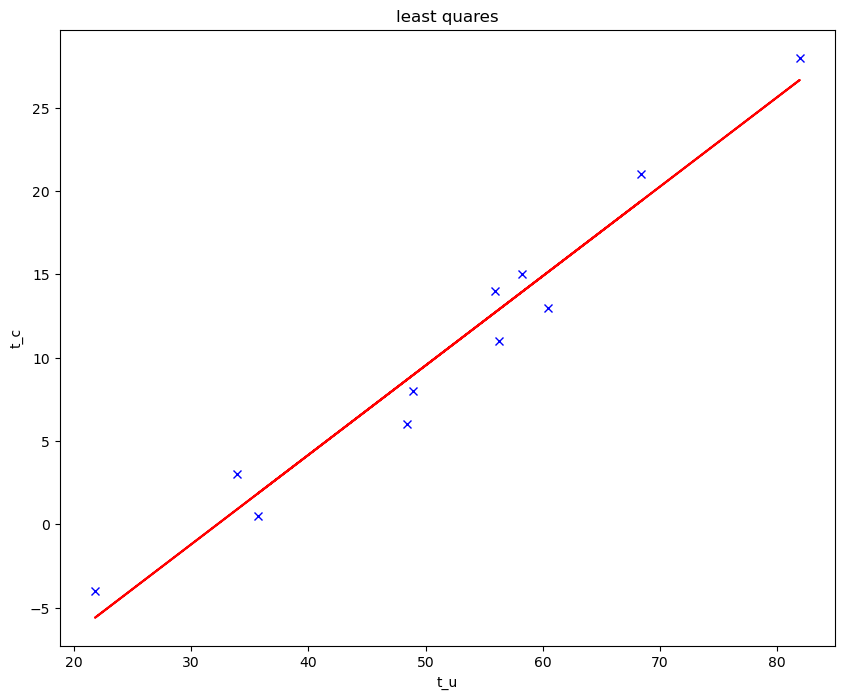

In [2]:
# least quares mit numpy
t_u = (values[:,1])
t_c =(values[:,0])
#plt.plot(values[:,1], values[:,0], 'x')
#plt.show()

x = t_u
y = t_c
def least_quares(x,y):
    A = np.vstack([x, np.ones(len(x))]).T
    y = y[:, np.newaxis]
    alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
    return alpha

params = least_quares(x,y)
print(params)

plt.figure(figsize = (10,8))
plt.plot(x, y, 'bx')
plt.plot(x, params[0]*x + params[1], 'r')
plt.xlabel('t_u')
plt.ylabel('t_c')
plt.title('least quares')
plt.show()
